In [31]:
import pandas as pd

In [32]:
#Loading dataset
df = pd.read_csv("airfoil_self_noise.csv")

In [33]:
df

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [34]:
#Checking for null values
df.isnull()

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1498,False,False,False,False,False,False
1499,False,False,False,False,False,False
1500,False,False,False,False,False,False
1501,False,False,False,False,False,False


In [35]:
#Checking correlation between the variables
df.corr()
#Displacement is 70% correlated with Angle of Attack

,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
Frquency(Hz),1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle_of_Attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord_Length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free_stream_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Displacement,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Sound_pressure_level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [36]:
df.drop(columns = ["Displacement"], inplace = True)

In [37]:
import numpy as np
from sklearn import linear_model

In [38]:
df.columns

Index(['Frquency(Hz)', 'Angle_of_Attack', 'Chord_Length',
       'Free_stream_velocity', 'Sound_pressure_level'],
      dtype='object')

In [44]:
regr = LinearRegression()
regr.fit(df[['Frquency(Hz)', 'Angle_of_Attack', 'Chord_Length',
       'Free_stream_velocity']], df[['Sound_pressure_level']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print(regr.coef_)

[[-1.29228931e-03 -7.07411623e-01 -4.02400474e+01  1.07100038e-01]]


In [52]:
import matplotlib.pyplot as plt

In [56]:
predictedSound = regr.predict([[200, 130, 120, 890]])

In [57]:
print(predictedSound)

[[-4692.29724644]]


In [72]:
df = df.rename(columns = {'Frquency(Hz)':'frequency'})

In [73]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('Sound_pressure_level ~ Angle_of_Attack + frequency + Chord_Length + Free_stream_velocity', data=df).fit()

#view model summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Sound_pressure_level   R-squared:                       0.485
Model:                              OLS   Adj. R-squared:                  0.483
Method:                   Least Squares   F-statistic:                     352.1
Date:                  Tue, 04 May 2021   Prob (F-statistic):          9.41e-214
Time:                          13:51:57   Log-Likelihood:                -4536.9
No. Observations:                  1503   AIC:                             9084.
Df Residuals:                      1498   BIC:                             9110.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept   

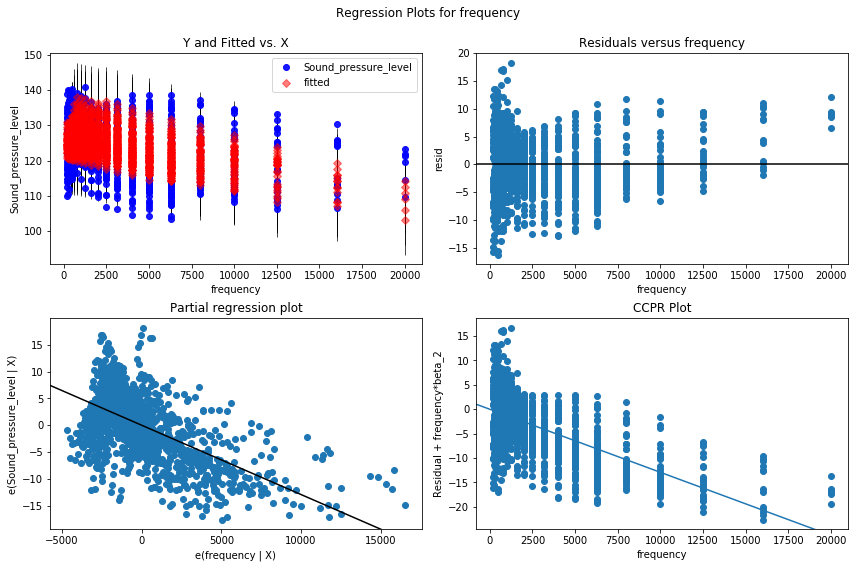

In [74]:
#create residual vs. predictor plot for 'frequency'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'frequency', fig=fig)

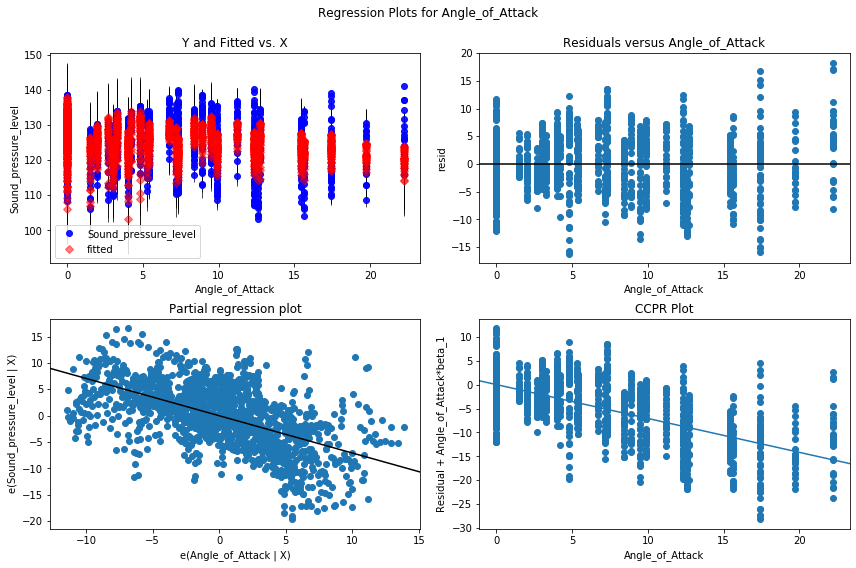

In [75]:
#create residual vs. predictor plot for 'Angle_of_Attack'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Angle_of_Attack', fig=fig)

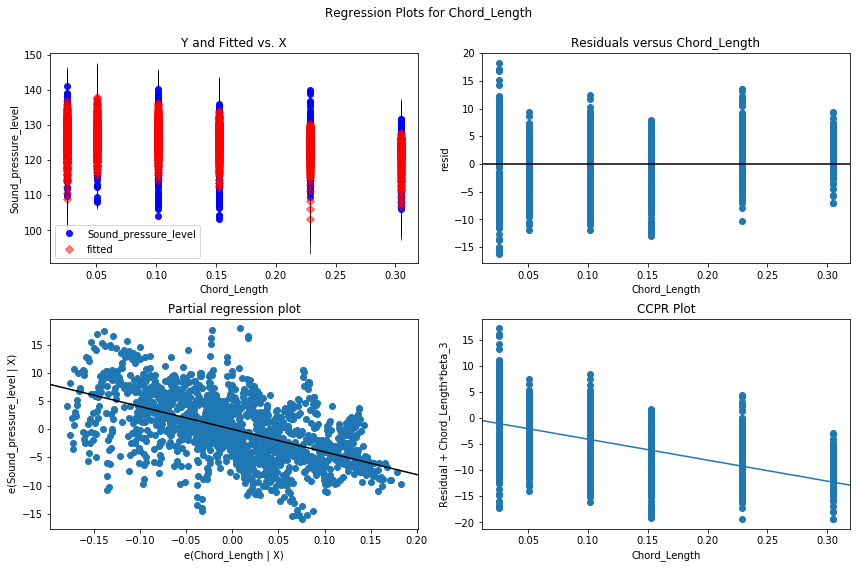

In [76]:
#create residual vs. predictor plot for 'Chord_Length'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Chord_Length', fig=fig)

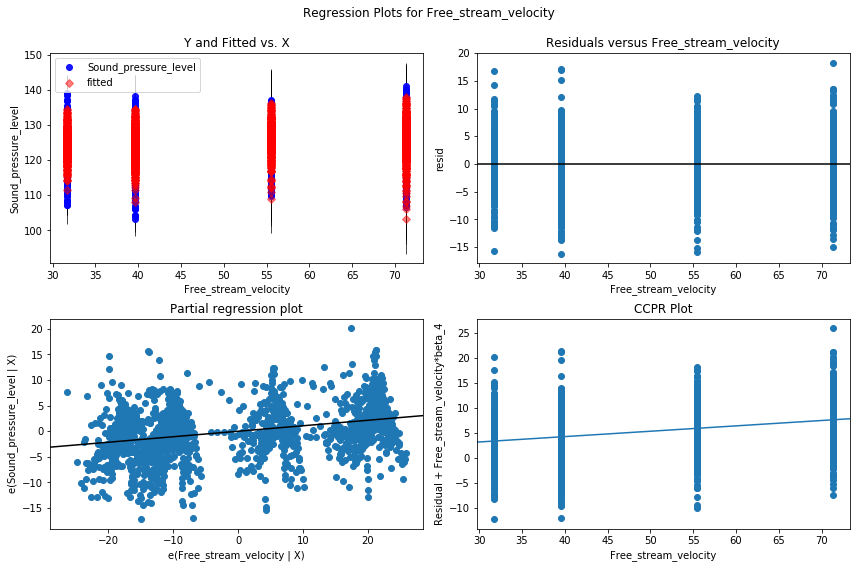

In [77]:
#create residual vs. predictor plot for 'Free_stream_velocity'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Free_stream_velocity', fig=fig)

In [79]:
df['log_sound'] = np.log10(df['Sound_pressure_level'])

In [80]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
log_model = ols('log_sound ~ Angle_of_Attack + frequency + Chord_Length + Free_stream_velocity', data=df).fit()

#view model summary
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sound   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     359.7
Date:                Tue, 04 May 2021   Prob (F-statistic):          3.83e-217
Time:                        14:03:05   Log-Likelihood:                 3957.0
No. Observations:                1503   AIC:                            -7904.
Df Residuals:                    1498   BIC:                            -7878.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.1262 

In [81]:
df.columns

Index(['frequency', 'Angle_of_Attack', 'Chord_Length', 'Free_stream_velocity',
       'Sound_pressure_level', 'log_sound'],
      dtype='object')

In [83]:
#Training and testing
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(df[['frequency', 'Angle_of_Attack', 'Chord_Length',
       'Free_stream_velocity']], df[['Sound_pressure_level']], test_size = 0.2)

In [89]:
from sklearn.linear_model import LinearRegression

In [127]:
lr = LinearRegression()

In [128]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
x_test_1 = lr.predict(x_test)

In [130]:
y_test

,Sound_pressure_level
675,111.135
79,106.582
857,128.990
443,126.189
556,131.807
...,...
500,129.117
68,125.872
1125,131.808
140,114.042


In [136]:
x_test_1

array([[117.98553783],
       [107.13238134],
       [127.10923923],
       [121.6821405 ],
       [128.57347478],
       [130.6464472 ],
       [125.13466751],
       [120.91657228],
       [125.76979637],
       [122.07813994],
       [124.81864713],
       [124.7462877 ],
       [125.04373744],
       [119.15540897],
       [122.43652397],
       [125.76013702],
       [135.51996702],
       [126.79152726],
       [128.54424966],
       [128.05015327],
       [126.55118194],
       [128.9188501 ],
       [127.67736284],
       [117.67246615],
       [126.45218008],
       [126.59865631],
       [129.81395042],
       [114.10929496],
       [133.52675176],
       [124.41251208],
       [127.89785769],
       [123.29541339],
       [128.62312547],
       [136.78561062],
       [127.20723894],
       [127.29902576],
       [124.38607598],
       [121.59107442],
       [132.2884714 ],
       [132.16232515],
       [130.37228619],
       [125.87200161],
       [126.37947707],
       [123

In [135]:
#Checing accuracy of the model
lr.score(x_test, y_test)

0.5363293004888339